In [14]:
import pandas as pd
from fbprophet import Prophet

# データフレームの読み込み
df = pd.read_csv(r"C:\Users\Windows\prophet\stockdata\6758_2015_2020.csv", encoding = 'shift-jis')
# データフレームの出力
df.columns = ['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close']
df

,Date,Open,High,Low,Close,Volume,Adj Close
0,2015/1/5,2471.5,2479.0,2408.5,2468.5,7626800,2468.5
1,2015/1/6,2399.0,2466.0,2397.0,2439.5,7926500,2439.5
2,2015/1/7,2422.5,2590.5,2421.0,2552.5,15640000,2552.5
3,2015/1/8,2560.5,2613.5,2527.5,2565.0,11345200,2565.0
4,2015/1/9,2584.0,2629.0,2576.0,2599.0,9552200,2599.0
...,...,...,...,...,...,...,...
1366,2020/8/20,8526.0,8535.0,8300.0,8354.0,8100600,8354.0
1367,2020/8/21,8351.0,8370.0,8263.0,8284.0,5763500,8284.0
1368,2020/8/24,8300.0,8413.0,8257.0,8407.0,3720500,8407.0
1369,2020/8/25,8450.0,8478.0,8376.0,8423.0,3671300,8423.0


In [11]:
# カラム名をdsとyに変更
df = df.rename(columns={'Date':'ds', 'Adj Close':'y'})
df

,ds,Open,High,Low,Close,Volume,y
0,2015/1/5,2471.5,2479.0,2408.5,2468.5,7626800,2468.5
1,2015/1/6,2399.0,2466.0,2397.0,2439.5,7926500,2439.5
2,2015/1/7,2422.5,2590.5,2421.0,2552.5,15640000,2552.5
3,2015/1/8,2560.5,2613.5,2527.5,2565.0,11345200,2565.0
4,2015/1/9,2584.0,2629.0,2576.0,2599.0,9552200,2599.0
...,...,...,...,...,...,...,...
1366,2020/8/20,8526.0,8535.0,8300.0,8354.0,8100600,8354.0
1367,2020/8/21,8351.0,8370.0,8263.0,8284.0,5763500,8284.0
1368,2020/8/24,8300.0,8413.0,8257.0,8407.0,3720500,8407.0
1369,2020/8/25,8450.0,8478.0,8376.0,8423.0,3671300,8423.0


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
c:\users\windows\appdata\local\programs\python\python38\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


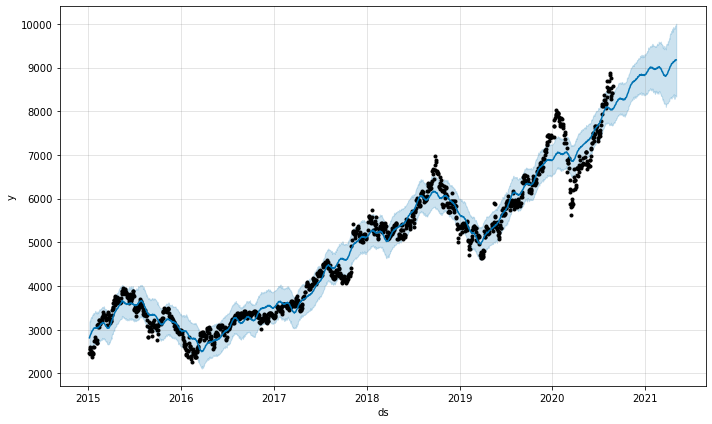

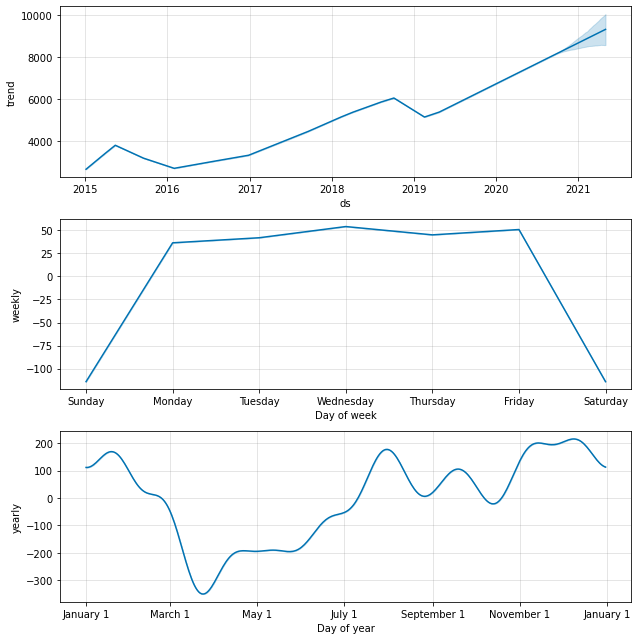

In [12]:
# Prophetのインスタンス化
m = Prophet()

# fitメソッドでデータを学習させる
m.fit(df)

# make_future_dataframeメソッドで予測分の未来のデータフレームの作成
future = m.make_future_dataframe(periods=250)

# 月曜=0,火曜=1,水曜=2,木曜=3,金曜=4,土曜=5,日曜=6
future = future[future['ds'].dt.weekday < 5]

# 予測する
forecast = m.predict(future)

# 予測結果の描画
fig1 = m.plot(forecast)

# トレンド、周期性の描画
fig2 = m.plot_components(forecast)

# plotlyを使って描画
#from fbprophet.plot import plot_plotly
#import plotly.offline as py

#fig1 = plot_plotly(m, forecast)
#py.plot(fig1)